In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
x_data = np.linspace(0.0,10.0,1000000)

In [4]:
noise = np.random.randn(len(x_data))

In [5]:
noise

array([-0.16050843,  0.91964956,  1.77728771, ..., -0.39058748,
       -1.90393404, -0.63083754])

y = mx+b

b = 5

In [6]:
y_true = (0.5 * x_data) + 5 + noise

In [7]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

In [8]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [9]:
y_df.head()

,Y
0,4.839492
1,5.919655
2,6.777298
3,4.209038
4,4.204117


In [10]:
my_data = pd.concat([x_df,y_df], axis=1)

In [11]:
my_data.head()

,X Data,Y
0,0.00000,4.839492
1,0.00001,5.919655
2,0.00002,6.777298
3,0.00003,4.209038
4,0.00004,4.204117


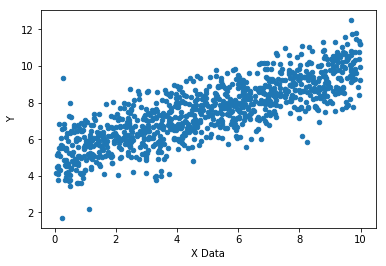

In [16]:
my_data.sample(n=1000).plot(kind='scatter',x='X Data', y="Y")

In [17]:
batch_size = 10

Create variables with random numbers

In [18]:
m = tf.Variable(0.81)
b = tf.Variable(0.17)

Create placeholders with x and y

In [19]:
xph = tf.placeholder(tf.float32,[batch_size])

In [20]:
yph = tf.placeholder(tf.float32,[batch_size])

Create function to be estimated

In [21]:
y_model = m*xph + b

Define error

In [22]:
error = tf.reduce_sum(tf.square(yph - y_model))

Set up Optimizer with learning rate and trainer to min/max error

In [23]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

Initialize global variables

In [24]:
init = tf.global_variables_initializer()

In tf.Session run with batches. Each batch will take batch_size and run it through neural network!

In [32]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train, feed_dict = feed)
        
    model_m, model_b = sess.run([m,b])
    
        

In [37]:
model_m

0.53212583

In [38]:
model_b

4.996966

In [39]:
y_hat = x_data*model_m + model_b

Plot the result

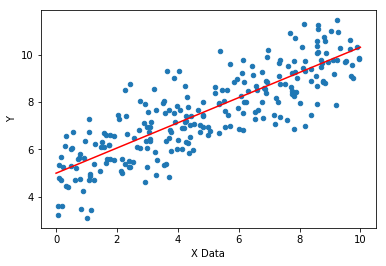

In [36]:
my_data.sample(n=250).plot(kind='scatter',x='X Data', y="Y")
plt.plot(x_data,y_hat,'r')